In [164]:
# Investigation into cold sky subtraction

In [165]:
# Imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [166]:
# Read in the "hot" dataframe
dfhot = pd.read_csv('/home/dcohen/Dropbox/Public/ra/laboratory/devel/soapy/data/airspy/spec_20210516.csv',header=None)

In [167]:
dfhot.head()

,0,1,2,3,4,5,6,7,8,9,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029
0,2021-05-16,01:48:51,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.37350,-120.119286,-119.796770,-119.46457,...,-120.12666,-120.176170,-120.278090,-120.14093,-120.11672,-120.24888,-120.255646,-120.244360,-120.38765,-120.448350
1,2021-05-16,01:49:12,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.44074,-120.187004,-119.834700,-119.50197,...,-120.19367,-120.225860,-120.319244,-120.19197,-120.17726,-120.30832,-120.327970,-120.276870,-120.42566,-120.514565
2,2021-05-16,01:49:33,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.43840,-120.201294,-119.854270,-119.53053,...,-120.21500,-120.257350,-120.322990,-120.19339,-120.18417,-120.30531,-120.327840,-120.307915,-120.44625,-120.530400
3,2021-05-16,01:49:54,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.39651,-120.170020,-119.862785,-119.52336,...,-120.21735,-120.248955,-120.353680,-120.23220,-120.18565,-120.30141,-120.322716,-120.294266,-120.45053,-120.496530
4,2021-05-16,01:50:14,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.42976,-120.180320,-119.888870,-119.55298,...,-120.22850,-120.266310,-120.345780,-120.21786,-120.20296,-120.35663,-120.333600,-120.327560,-120.47821,-120.508510


In [168]:
# How many rows?
dfhot.shape

(2109, 1030)

In [169]:
# Read in the "cold" dataframe
dfcold = pd.read_csv('/home/dcohen/Dropbox/Public/ra/laboratory/devel/soapy/data/airspy/spec_20210516.csv',header=None)

In [170]:
dfcold.head()

,0,1,2,3,4,5,6,7,8,9,...,1020,1021,1022,1023,1024,1025,1026,1027,1028,1029
0,2021-05-16,01:48:51,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.37350,-120.119286,-119.796770,-119.46457,...,-120.12666,-120.176170,-120.278090,-120.14093,-120.11672,-120.24888,-120.255646,-120.244360,-120.38765,-120.448350
1,2021-05-16,01:49:12,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.44074,-120.187004,-119.834700,-119.50197,...,-120.19367,-120.225860,-120.319244,-120.19197,-120.17726,-120.30832,-120.327970,-120.276870,-120.42566,-120.514565
2,2021-05-16,01:49:33,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.43840,-120.201294,-119.854270,-119.53053,...,-120.21500,-120.257350,-120.322990,-120.19339,-120.18417,-120.30531,-120.327840,-120.307915,-120.44625,-120.530400
3,2021-05-16,01:49:54,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.39651,-120.170020,-119.862785,-119.52336,...,-120.21735,-120.248955,-120.353680,-120.23220,-120.18565,-120.30141,-120.322716,-120.294266,-120.45053,-120.496530
4,2021-05-16,01:50:14,1.419156e+09,1.421656e+09,2441.40625,52428800,-120.42976,-120.180320,-119.888870,-119.55298,...,-120.22850,-120.266310,-120.345780,-120.21786,-120.20296,-120.35663,-120.333600,-120.327560,-120.47821,-120.508510


In [171]:
# Set the rows to read
row_sky = 1400
row_cold = 500

In [172]:
# Get observation date and time
obs_date = dfhot.iloc[row_sky,0]
obs_time = dfhot.iloc[row_sky,1]

In [173]:
obs_time

' 09:58:11'

In [174]:
# Get only the actual data in a single row, leaving out the time - starting from column 6 to end
dfhot_series = dfhot.iloc[row_sky,6:]

In [175]:
dfhot_series

6      -120.472
7      -120.225
8      -119.912
9      -119.569
10     -119.368
         ...   
1025   -120.341
1026   -120.345
1027   -120.338
1028   -120.499
1029   -120.553
Name: 1400, Length: 1024, dtype: object

In [176]:
# Do the same with the cold data, picking the zeroth row in the cold file - starting from column 6 to end
dfcold_series = dfcold.iloc[row_cold,6:]

In [177]:
dfcold_series

6      -120.478
7      -120.245
8      -119.932
9      -119.602
10     -119.423
         ...   
1025   -120.393
1026   -120.404
1027    -120.37
1028   -120.519
1029    -120.57
Name: 500, Length: 1024, dtype: object

In [178]:
# Try scaling the cold series to see if the correction can be improved
dfcold_series = dfcold_series * 1.011

In [179]:
# Subtract the cold from the hot series
corrected_series = dfhot_series.subtract(dfcold_series)

In [180]:
corrected_series

6       1.33081
7       1.34291
8       1.33886
9        1.3489
10      1.36866
         ...   
1025    1.37679
1026    1.38281
1027     1.3559
1028    1.34539
1029    1.34387
Length: 1024, dtype: object

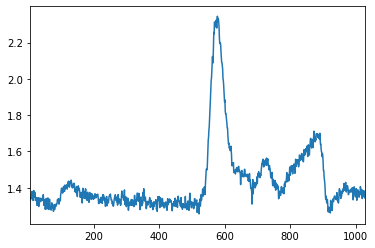

In [181]:
# Let's see what it looks like - should be flat w/ no IF spike
corrected_series.plot(x='Sample Number', y = 'Power, dB')
plt.show()